# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import countrywrangler as cw

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(df_data.shape)
print(df_data.columns)
df_data.head()

(4324, 9)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
# Check for NaN values
nan_values = df_data.isna().any()

# Print columns with NaN values
columns_with_nan = nan_values[nan_values].index.tolist()
print("Columns with NaN values:")
print(columns_with_nan)

# Check for duplicates
has_duplicates = df_data.duplicated().any()

if has_duplicates:
    print("There are duplicates in the DataFrame.")
else:
    print("There are no duplicates in the DataFrame.")

Columns with NaN values:
['Price']
There are no duplicates in the DataFrame.


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [6]:
# Remove a column from df_data
del df_data['Unnamed: 0.1']
del df_data['Unnamed: 0']

In [7]:
df_data.head(100)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
95,ILS,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Wed Oct 09, 2019 10:17 UTC",Proton-M/Briz-M | Eutelsat 5 West B & MEV-1,StatusActive,65.0,Success
96,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Fri Oct 04, 2019 18:51 UTC",Long March 4C | Gaofen 10 (Replacement),StatusActive,64.68,Success
97,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Thu Sep 26, 2019 07:46 UTC",Soyuz 2.1b/Fregat | Cosmos 2541,StatusActive,48.5,Success
98,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Wed Sep 25, 2019 13:57 UTC",Soyuz FG | Soyuz MS-15 (61S),StatusRetired,NaN,Success


## Descriptive Statistics

In [8]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [9]:
launches_per_organization = df_data['Organisation'].value_counts()

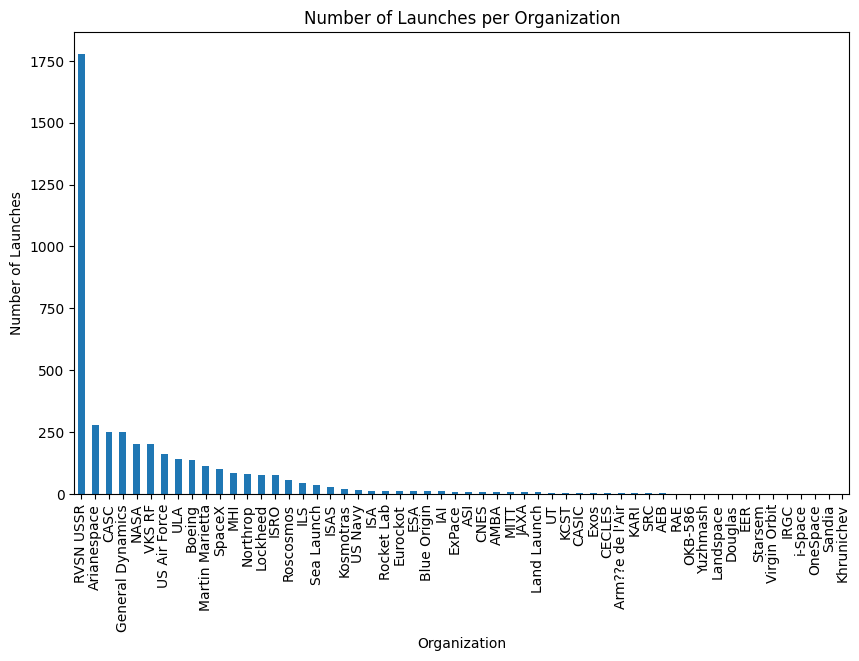

In [10]:
# Plot the number of launches per organization
plt.figure(figsize=(10, 6))
launches_per_organization.plot(kind='bar')
plt.title('Number of Launches per Organization')
plt.xlabel('Organization')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [11]:
# Get all the unique values in the "Rocket_status" column
rocket_status_values = df_data['Rocket_Status'].unique()

# Print all the unique values
print("Rocket status values:")
for status in rocket_status_values:
    print(status)


Rocket status values:
StatusActive
StatusRetired


In [12]:
# Count the occurrences of each unique value in the "Rocket_status" column
rocket_status_counts = df_data['Rocket_Status'].value_counts()

# Retrieve the counts for active and decommissioned rockets
active_count = rocket_status_counts.get('StatusActive', 0)
decommissioned_count = rocket_status_counts.get('StatusRetired', 0)

# Print the number of active and decommissioned rockets
print("Number of active rockets:", active_count)
print("Number of decommissioned rockets:", decommissioned_count)


Number of active rockets: 790
Number of decommissioned rockets: 3534


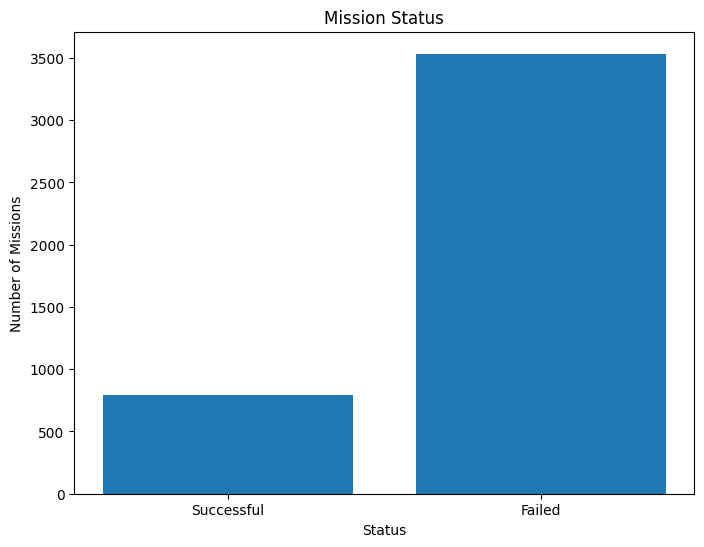

In [13]:
# Create a bar plot to visualize the mission status
plt.figure(figsize=(8, 6))
plt.bar(['Successful', 'Failed'], [active_count, decommissioned_count])
plt.title('Mission Status')
plt.xlabel('Status')
plt.ylabel('Number of Missions')
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [14]:
# Count the occurrences of each unique value in the "Mission_Status" column
mission_status_counts = df_data['Mission_Status'].value_counts()

# Get the number of successful and failed missions
successful_count = mission_status_counts.get('Success', 0)
failed_count = mission_status_counts.get('Failure', 0)

# Print the number of active and decommissioned rockets
print("Number of active rockets:", successful_count)
print("Number of decommissioned rockets:", failed_count)

Number of active rockets: 3879
Number of decommissioned rockets: 339


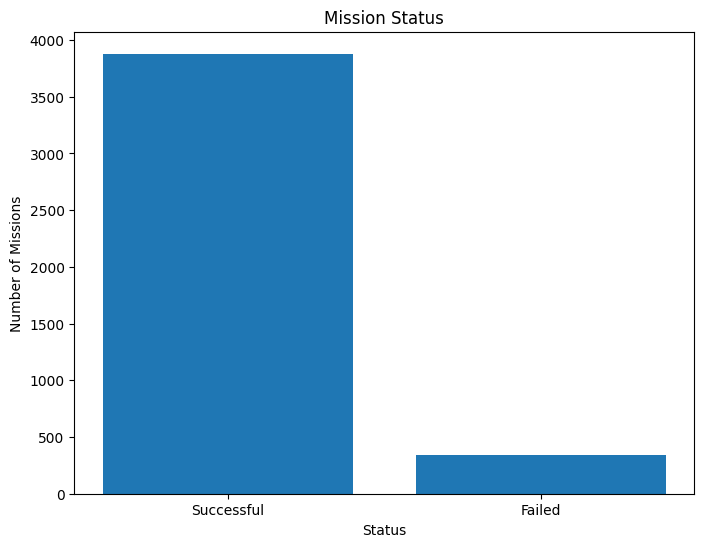

In [15]:
# Create a bar plot to visualize the mission status
plt.figure(figsize=(8, 6))
plt.bar(['Successful', 'Failed'], [successful_count, failed_count])
plt.title('Mission Status')
plt.xlabel('Status')
plt.ylabel('Number of Missions')
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [16]:
# Remove commas from the "Price" column
df_data['Price'] = df_data['Price'].str.replace(',', '')

# Convert the "Price" column to float
df_data['Price'] = df_data['Price'].astype(float)

# Calculate the mean of the "Price" column excluding NaN values
mean_price = df_data['Price'].mean(skipna=True)

# Replace NaN values with the mean
df_data['Price'].fillna(mean_price, inplace=True)


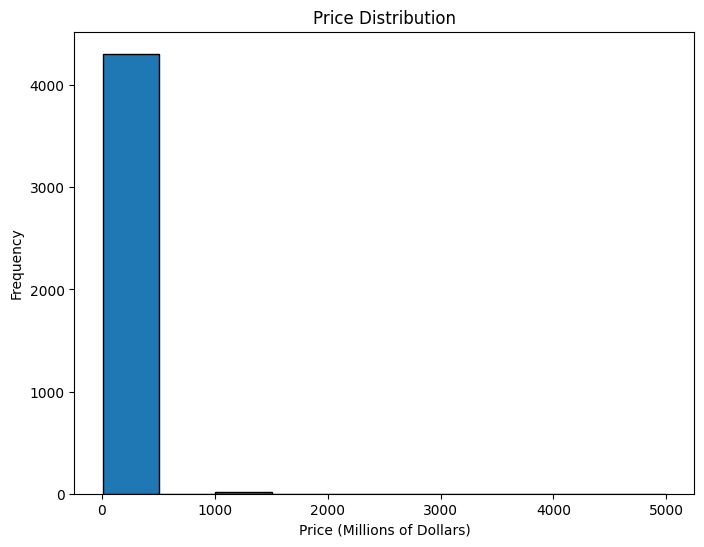

In [17]:
# Extract the price column in millions of dollars
price_millions = df_data['Price']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(price_millions, bins=10, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (Millions of Dollars)')
plt.ylabel('Frequency')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [22]:
def process_location(location):
    if 'Gran Canaria' in location:
      return "USA"
    elif r'New Mexico' in location:
       return "USA"

df_data['Location'].apply(process_location)

print(df_data['Location'])

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object


In [23]:
# Create a new "Country" column by extracting the last word from the "Location" column
df_data['Country'] = df_data['Location'].str.split().str[-1]

# Print the updated DataFrame
print(df_data['Country'])

launches_by_country = df_data.groupby('Country')['Mission_Status'].sum().reset_index()

print(launches_by_country)

# Create a new column for alpha-3 country codes
launches_by_country['Country_Code'] = launches_by_country['Country'].apply(lambda x: countries.get(x) if countries.get(x) else '')

# Print the updated DataFrame
print(df_data)


0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Name: Country, Length: 4324, dtype: object
       Country                                     Mission_Status
0    Australia         SuccessFailureFailureFailureSuccessSuccess
1       Brazil                    Prelaunch FailureFailureFailure
2      Canaria                                     SuccessSuccess
3        China  SuccessSuccessSuccessFailureSuccessSuccessSucc...
4     Facility                                            Failure
5       France  SuccessSuccessSuccessSuccessSuccessFailureSucc...
6        India  SuccessSuccessSuccessSuccessSuccessSuccessSucc...
7         Iran  FailurePrelaunch FailureFailureFailureFailureF...
8       Israel  SuccessSuccessSuccessSuccessSuccessFailureSucc...
9        Japan  SuccessSuccessSuccessSuccessSuccessSuccessSucc...
10  Kazakhstan  Succes

KeyError: 'Canaria'

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=launches_by_country['Country'],
    z=launches_by_country['Mission_Status'],
    text=launches_by_country['Country'],
    colorscale='YlOrRd',
    autocolorscale=False,
    marker_line_color='white',
    marker_line_width=0.5,
    colorbar_title='Number of Launches'
))

fig.update_layout(
    title_text='Number of Launches by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()


# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 